# Previsão de Ataques de Civis e Ocorrência de Sub-eventos durante os conflitos na Ucrânia
### Autores: Amarilda Chihepe, Ludmila Mucavele

### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introduction

The conflicts in Ukraine have garnered significant international attention in recent years. Ukraine, a country located in Eastern Europe, has experienced a series of complex and multifaceted conflicts that have had far-reaching implications for its people and the region as a whole. One of the most notable conflicts in Ukraine is its ongoing confrontation with Russia, which has had a profound impact on the political, social, and economic landscape of both nations.

Dataset Information:

The dataset used to analyze the conflicts in Ukraine provides valuable insights into the nature and dynamics of these conflicts. It includes various attributes that capture important aspects of the events, actors, and consequences associated with the conflicts. The dataset contains information such as the year of the conflict, the type of disorder, the specific event type, sub-event type, and the involved actors.


##  Data Gathering

There are two datasets, one that contains data from 2014 to 2021 (df1) and another that contains the data from 2018 to 2023 (df2).

In [2]:
df1 = pd.read_csv('./Datasets/conflict_data_ukr-14-21.csv')
df2 = pd.read_csv('./Datasets/UkraineConflict-18-23.csv')

In [3]:
df1.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,NaN,NaN,#date+year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#date+end,NaN,NaN,NaN,NaN,#affected+killed,NaN,NaN,NaN,NaN
1,147997.0,UKR-2014-1-14085-0,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,5.0,0.0,0.0,5,5.0,5.0,369.0,NaN
2,149221.0,UKR-2014-1-14085-1,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,0.0,0.0,1.0,1,1.0,1.0,369.0,NaN
3,149248.0,UKR-2014-1-14085-3,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,10.0,4.0,0.0,12.0,26,26.0,26.0,369.0,NaN
4,149249.0,UKR-2014-1-14085-4,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,0.0,0.0,2.0,2,2.0,2.0,369.0,NaN


In [4]:
df2.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-19,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,NaN,1649875498
1,ROU1885,28-Mar-22,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,NaN,1649184809
2,ROU1940,28-Jul-22,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-Jul-22,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1660055880
4,ROU1947,4-Aug-22,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882


## Data Assessing

* **Dataset 1 (Conflicto de 2014 a 2021)**

In [5]:
print(df1.shape)
df1.info()

(2990, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2989 non-null   float64
 1   relid              2989 non-null   object 
 2   year               2990 non-null   object 
 3   active_year        2989 non-null   float64
 4   code_status        2989 non-null   object 
 5   type_of_violence   2989 non-null   float64
 6   conflict_dset_id   2989 non-null   float64
 7   conflict_new_id    2989 non-null   float64
 8   conflict_name      2989 non-null   object 
 9   dyad_dset_id       2989 non-null   float64
 10  dyad_new_id        2989 non-null   float64
 11  dyad_name          2989 non-null   object 
 12  side_a_dset_id     2989 non-null   float64
 13  side_a_new_id      2989 non-null   float64
 14  side_a             2990 non-null   object 
 15  side_b_dset_id     2989 non-null   float64
 16  side_b_new_id

In [6]:
df1.duplicated().sum()

0

In [7]:
df1.isnull().sum()

id                      1
relid                   1
year                    0
active_year             1
code_status             1
type_of_violence        1
conflict_dset_id        1
conflict_new_id         1
conflict_name           1
dyad_dset_id            1
dyad_new_id             1
dyad_name               1
side_a_dset_id          1
side_a_new_id           1
side_a                  0
side_b_dset_id          1
side_b_new_id           1
side_b                  0
number_of_sources       1
source_article          0
source_office           1
source_date             1
source_headline         0
source_original        19
where_prec              1
where_coordinates       0
where_description     311
adm_1                 228
adm_2                 707
latitude                0
longitude               0
geom_wkt                1
priogrid_gid            1
country                 0
iso3                    0
country_id              1
region                  0
event_clarity           1
date_prec   

In [8]:
# looking for numer of uninque values per feature
df1.nunique()

id                   2989
relid                2989
year                    9
active_year             2
code_status             1
type_of_violence        2
conflict_dset_id        5
conflict_new_id         5
conflict_name           5
dyad_dset_id            7
dyad_new_id             7
dyad_name               5
side_a_dset_id          2
side_a_new_id           2
side_a                  3
side_b_dset_id          7
side_b_new_id           7
side_b                  6
number_of_sources      14
source_article       2323
source_office         279
source_date          1508
source_headline      1817
source_original       812
where_prec              7
where_coordinates     402
where_description    1569
adm_1                   6
adm_2                  65
latitude              422
longitude             424
geom_wkt              424
priogrid_gid           32
country                 2
iso3                    2
country_id              1
region                  2
event_clarity           2
date_prec   

* **Dataset 2 (Conflicto de 2018 a 2023)**

In [9]:
print(df2.shape)

# general information of df2
df2.info()

(96082, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96082 entries, 0 to 96081
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EVENT_ID_CNTY       96082 non-null  object 
 1   EVENT_DATE          96082 non-null  object 
 2   YEAR                96082 non-null  int64  
 3   TIME_PRECISION      96082 non-null  int64  
 4   DISORDER_TYPE       96082 non-null  object 
 5   EVENT_TYPE          96082 non-null  object 
 6   SUB_EVENT_TYPE      96082 non-null  object 
 7   ACTOR1              96082 non-null  object 
 8   ASSOC_ACTOR_1       6488 non-null   object 
 9   INTER1              96082 non-null  int64  
 10  ACTOR2              51829 non-null  object 
 11  ASSOC_ACTOR_2       14678 non-null  object 
 12  INTER2              96082 non-null  int64  
 13  INTERACTION         96082 non-null  int64  
 14  CIVILIAN_TARGETING  4188 non-null   object 
 15  ISO                 96082 non-null  int64

In [10]:
# looking for null values from ACTOR2 in df2
df2['ACTOR2'].isna().sum()

44253

In [11]:
# looking for disorder type values 
df1.conflict_name.value_counts()

Ukraine: Novorossiya                                                              2032
Ukraine: Donetsk                                                                   656
Ukraine: Lugansk                                                                   294
Ukraine: Government                                                                  6
Supporters of independence for Eastern Ukraine - Supporters of Ukrainian unity       1
Name: conflict_name, dtype: int64

In [12]:
df1.side_a.value_counts()

Government of Ukraine                             2988
#group+name+first                                    1
Supporters of independence for Eastern Ukraine       1
Name: side_a, dtype: int64

In [13]:
# looking for disorder type values 
df2.DISORDER_TYPE.value_counts()

Political violence                    87884
Demonstrations                         5799
Strategic developments                 2381
Political violence; Demonstrations       18
Name: DISORDER_TYPE, dtype: int64

In [14]:
# looking for associated actors
df2.ASSOC_ACTOR_2.value_counts()

Donbass People's Militia                                                                                         9155
Luhansk People's Militia                                                                                         2825
Donbass People's Militia; Civilians (Ukraine)                                                                     638
Civilians (Ukraine)                                                                                               272
Luhansk People's Militia; Civilians (Ukraine)                                                                     161
                                                                                                                 ... 
Lawyers (Ukraine); Former Government of Ukraine (2019-)                                                             1
European Solidarity; Government of Ukraine (2019-)                                                                  1
Refugees/IDPs (Afghanistan); Civilians (Syria); Refugees

In [15]:
df2.ACTOR2.value_counts()

NAF: United Armed Forces of Novorossiya       19387
Military Forces of Ukraine (2019-)            14713
Military Forces of Ukraine (2014-2019)         8045
Civilians (Ukraine)                            4542
Military Forces of Russia (2000-)              2791
                                              ...  
Civilians (Vietnam)                               1
Civilians (Democratic Republic of Congo)          1
Patriots - For Life                               1
Civilians (Uzbekistan)                            1
Military Forces of Ukraine (2019-) Marines        1
Name: ACTOR2, Length: 88, dtype: int64

### Observations

* First index of df1
* Year of df1 as object type
* Missing values in Actor 2 feature from df2
* Datapoints from 2018-2021 not needed in df1
* `deaths_a`, `deaths_b`, `deaths_civilians`, `deaths_unknown` features values
* All df2 features in Uppercase
* Features to delete from df1:
    * id
    * relid
    * active_year
    * code_status
    * code_status
    * code_status
    * conflict_new_id
    * conflict_name
    * dyad_dset_id
    * dyad_new_id
    * dyad_name
    * side_a_dset_id
    * side_a_new_id
    * side_b_dset_id
    * side_b_dset_id
    * number_of_sources
    * source_article
    * source_article
    * source_date
    * source_headline
    * source_original
    * where_prec
    * where_description
    * geom_wkt
    * priogrid_gid
    * country_id
    * event_clarity
    * date_prec
    * date_start
    * date_end
    * date_end
    * deaths_b
    * deaths_civilians
    * deaths_civilians
    * best
    * high
    * low
    * gwnoa
    * gwnob
* Features to delete from df2:
    * EVENT_ID_CNTY
    * EVENT_DATE
    * TIME_PRECISION
    * SOURCE
    * SOURCE_SCALE
    * NOTES
    * TAGS
    * TIMESTAMP
* Unconcatenated datasets
* Too many associated actors in a column.
* `civilian_targeting` non-binary type

## Data Cleaning

* Drop first index of df1 

#### Code

In [16]:
df1.drop(0, axis = 0, inplace = True)
df1.reset_index(drop = True, inplace = True)

#### Test

In [17]:
df1.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,147997.0,UKR-2014-1-14085-0,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,5.0,0.0,0.0,5,5.0,5.0,369.0,NaN
1,149221.0,UKR-2014-1-14085-1,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,0.0,0.0,1.0,1,1.0,1.0,369.0,NaN
2,149248.0,UKR-2014-1-14085-3,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,10.0,4.0,0.0,12.0,26,26.0,26.0,369.0,NaN
3,149249.0,UKR-2014-1-14085-4,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,0.0,0.0,2.0,2,2.0,2.0,369.0,NaN
4,149251.0,UKR-2014-1-14085-6,2014,1.0,Clear,1.0,13219.0,13219.0,Ukraine: Government,14085.0,...,00:00.0,0.0,0.0,0.0,6.0,6,6.0,6.0,369.0,NaN


* Change `year` of df1 to integer type

#### Code

In [18]:
df1.year = df1.year.astype('int64')

#### Test

In [19]:
df1.year.dtype

dtype('int64')

* Imputing missing values in `Actor2` feature from df2 with 'None'

#### Code

In [20]:
df2.loc[df2['ACTOR2'].isna(), 'ACTOR2'] = 'None'

#### Test

In [21]:
df2[df2['ACTOR2'] == 'None'].shape

(44253, 31)

* Delete datapoints from 2018-2021 in df1

#### Code

In [22]:
index = df1[df1.year >= 2018].index.values
df1.drop(index, axis = 0, inplace = True)
df1.shape

(2325, 50)

#### Test

In [23]:
df1[df1.year >= 2018]

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob


* Join `deaths_a`, `deaths_b`, `deaths_civilians`, `deaths_unknown` features values as `fatalities`

#### Code

In [24]:
# joining columns values into one new column
a = df1.deaths_a.values
b = df1.deaths_b.values
c = df1.deaths_civilians.values
d = df1.deaths_unknown.values
df1['fatalities'] = a + b + c + d

# dropping the columns
df1.drop(columns = ['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown'], inplace = True)

#### Test

In [25]:
print(df1.shape)
df1['fatalities']

(2325, 47)


0        5.0
1        1.0
2       26.0
3        2.0
4        6.0
        ... 
2828     1.0
2829     4.0
2830     1.0
2831     1.0
2832     1.0
Name: fatalities, Length: 2325, dtype: float64

*  Delete features from df1
    * id
    * relid
    * active_year
    * code_status 
    * conflict_new_id
    * conflict_name
    * dyad_dset_id
    * dyad_new_id
    * dyad_name
    * side_a_dset_id
    * side_a_new_id
    * side_b_dset_id
    * side_b_dset_id
    * number_of_sources
    * source_article
    * source_article
    * source_date
    * source_headline
    * source_original
    * where_prec
    * where_description
    * geom_wkt
    * priogrid_gid
    * country_id
    * event_clarity
    * date_prec
    * date_start
    * date_end
    * date_end
    * deaths_b
    * deaths_civilians
    * deaths_civilians
    * best
    * high
    * low
    * gwnoa
    * gwnob

#### Code

In [26]:
index = list(df1.columns[[0, 1]]) + df1.columns[3:8].tolist() + df1.columns[9:14].tolist() + list(df1.columns[[15, 16]]) + df1.columns[18:25].tolist() + [df1.columns[26]] + [df1.columns[31]] + [df1.columns[32]] + df1.columns[34:46].tolist()
df1.drop(columns=index, inplace=True)

#### Test

In [27]:
df1.columns

Index(['year', 'conflict_name', 'side_a', 'side_b', 'where_coordinates',
       'adm_1', 'adm_2', 'latitude', 'longitude', 'country', 'fatalities'],
      dtype='object')

*  Delete features from df2:
    * EVENT_ID_CNTY
    * EVENT_DATE
    * TIME_PRECISION
    * SOURCE
    * SOURCE_SCALE
    * NOTES
    * TAGS
    * TIMESTAMP

#### Code

In [28]:
columns = ['EVENT_ID_CNTY', 'EVENT_DATE', 'TIME_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'TAGS', 'TIMESTAMP', 'REGION', 'ISO', 'GEO_PRECISION']
df2.drop(columns = columns, inplace=True)

#### Test

In [29]:
df2.columns

Index(['YEAR', 'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'COUNTRY', 'ADMIN1', 'ADMIN2',
       'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'FATALITIES'],
      dtype='object')

* Lowcase all df2 features

#### Code

In [30]:
df2.columns = df2.columns.str.lower()

#### Test

In [31]:
df2.columns

Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'country', 'admin1', 'admin2',
       'admin3', 'location', 'latitude', 'longitude', 'fatalities'],
      dtype='object')

* Concatenate datasets

#### Code

In [32]:
df1.columns

Index(['year', 'conflict_name', 'side_a', 'side_b', 'where_coordinates',
       'adm_1', 'adm_2', 'latitude', 'longitude', 'country', 'fatalities'],
      dtype='object')

In [33]:
df2.columns

Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'country', 'admin1', 'admin2',
       'admin3', 'location', 'latitude', 'longitude', 'fatalities'],
      dtype='object')

In [34]:
df1.rename(columns = {'side_a' : 'actor1', 'side_b' : 'actor2', 'where_coordinates' : 'location', 'adm_1': 'admin1',
                     'adm_2': 'admin2', 'conflict_name': 'disorder_type'}, inplace = True)

In [35]:
# replacing actor terms  Supporters
df1.disorder_type = df1.disorder_type.apply(lambda x: 'Demonstrations' if 'Supporters' in x else 'Political violence')
df1.disorder_type.value_counts()

Political violence    2324
Demonstrations           1
Name: disorder_type, dtype: int64

In [36]:
# replacing actor terms
df1.actor1 = df1.actor1.apply(lambda x: 'Military Forces of Ukraine' if 'Government of Ukraine' in x else x)
df1.actor2 = df1.actor2.apply(lambda x: 'Military Forces of Ukraine' if 'Government of Ukraine' in x else x)
df1.actor1.value_counts()

Military Forces of Ukraine                        2324
Supporters of independence for Eastern Ukraine       1
Name: actor1, dtype: int64

In [37]:
def replace_terms_actor (a, b):
    df2.actor1 = df2.actor1.apply(lambda x: a if b in x else x)
    df2.actor2 = df2.actor2.apply(lambda x: a if b in x else x)


In [38]:
# replacing actor terms for df2
replace_terms_actor('Military Forces of Ukraine', 'Military Forces of Ukraine')
 
replace_terms_actor('Military Forces of Russia', 'Military Forces of Russia')

replace_terms_actor('Military Forces of Romania', 'Military Forces of Romania')

replace_terms_actor('Military Forces of Russia', 'Military Forces of Russia')

replace_terms_actor('Police Forces of Romania', 'Police Forces of Romania')

replace_terms_actor('Police Forces of Ukraine', 'Police Forces of Ukraine')

replace_terms_actor('Military Forces of Turkey', 'Military Forces of Turkey')

replace_terms_actor('Military Forces of the United States', 'Military Forces of the United States')

replace_terms_actor('Government of Russia', 'Government of Russia')

replace_terms_actor('Police Forces of Ukraine', 'Police Forces of Ukraine')

replace_terms_actor('Police Forces of Russia', 'Police Forces of Russia')

replace_terms_actor('Military Forces of Belarus', 'Military Forces of Belarus')

replace_terms_actor('Military Forces of Canada', 'Military Forces of Canada')

replace_terms_actor('Government of Ukraine', 'Government of Ukraine')

df2.actor1.value_counts()

Military Forces of Russia                  34682
Military Forces of Ukraine                 32573
NAF: United Armed Forces of Novorossiya    20543
Protesters (Ukraine)                        5533
Unidentified Armed Group (Ukraine)          1010
                                           ...  
Henichesk Communal Militia (Ukraine)           1
Terpinnia Communal Militia (Ukraine)           1
Russian Occupation Government (Ukraine)        1
Chornobaivka Communal Militia (Ukraine)        1
Yuvileine Communal Militia (Ukraine)           1
Name: actor1, Length: 82, dtype: int64

In [39]:
# replacing actor terms for df1
df1.actor1 = df1.actor1.apply(lambda x: 'NAF: United Armed Forces of Novorossiya' if 'United Armed Forces of Novorossiya' in x else x)
df1.actor2 = df1.actor2.apply(lambda x: 'NAF: United Armed Forces of Novorossiya' if 'United Armed Forces of Novorossiya' in x else x)
df1.actor2.value_counts()

DPR                                        1066
NAF: United Armed Forces of Novorossiya     870
LPR                                         382
Maidan                                        6
Supporters of Ukrainian unity                 1
Name: actor2, dtype: int64

In [40]:
def replace_terms_assoc_actor (a, b):
    df2.assoc_actor_1 = df2.assoc_actor_1.apply(lambda x: a if b in x else x)
    df2.assoc_actor_2 = df2.assoc_actor_2.apply(lambda x: a if b in x else x)

In [41]:
# Split the string and keeping only the first associate actor
df2.assoc_actor_1 = df2.assoc_actor_1.apply(lambda x: str(x).split(';')[0])
df2.assoc_actor_2 = df2.assoc_actor_2.apply(lambda x: str(x).split(';')[0])
df2.assoc_actor_1 = df2.assoc_actor_1.apply(lambda x: str(x).split(',')[0])
df2.assoc_actor_2 = df2.assoc_actor_2.apply(lambda x: str(x).split(',')[0])

# replacing associate actor terms
replace_terms_assoc_actor('Military Forces of Ukraine', 'Military Forces of Ukraine')
 
replace_terms_assoc_actor('Military Forces of Russia', 'Military Forces of Russia')

replace_terms_assoc_actor('Military Forces of Romania', 'Military Forces of Romania')

replace_terms_assoc_actor('Military Forces of Russia', 'Military Forces of Russia')

replace_terms_assoc_actor('Police Forces of Romania', 'Police Forces of Romania')

replace_terms_assoc_actor('Police Forces of Ukraine', 'Police Forces of Ukraine')

replace_terms_assoc_actor('Military Forces of Turkey', 'Military Forces of Turkey')

replace_terms_assoc_actor('Military Forces of the United States', 'Military Forces of the United States')

replace_terms_assoc_actor('Government of Russia', 'Government of Russia')

replace_terms_assoc_actor('Police Forces of Ukraine', 'Police Forces of Ukraine')

replace_terms_assoc_actor('Police Forces of Russia', 'Police Forces of Russia')

replace_terms_assoc_actor('Military Forces of Canada', 'Military Forces of Canada')

replace_terms_assoc_actor('Military Forces of Belarus', 'Military Forces of Belarus')

replace_terms_assoc_actor('Government of Ukraine', 'Government of Ukraine')

# Split the string and keeping only the first actor
df2.actor1 = df2.actor1.apply(lambda x: str(x).split(',')[0])
df2.actor2 = df2.actor2.apply(lambda x: str(x).split(',')[0])
df2.assoc_actor_1.value_counts()

nan                                                           89594
Military Forces of Russia                                      1455
National Corps Party                                            865
Labor Group (Ukraine)                                           614
Refugees/IDPs (Ukraine)                                         301
                                                              ...  
Protesters (Hungary)                                              1
Refugees/IDPs (Kazakhstan)                                        1
Civilians (Russia)                                                1
OSCE: Organization for Security and Co-operation in Europe        1
Enerhodar Communal Militia (Ukraine)                              1
Name: assoc_actor_1, Length: 141, dtype: int64

In [42]:
# Imputing 'nan' value with 'None' 
df2.assoc_actor_1 = df2.assoc_actor_1.apply(lambda x: 'None' if 'nan' in x else x)
df2.assoc_actor_2 = df2.assoc_actor_2.apply(lambda x: 'None' if 'nan' in x else x)
df2.assoc_actor_1.value_counts()

None                                                          89594
Military Forces of Russia                                      1455
National Corps Party                                            865
Labor Group (Ukraine)                                           614
Refugees/IDPs (Ukraine)                                         301
                                                              ...  
Protesters (Hungary)                                              1
Refugees/IDPs (Kazakhstan)                                        1
Civilians (Russia)                                                1
OSCE: Organization for Security and Co-operation in Europe        1
Enerhodar Communal Militia (Ukraine)                              1
Name: assoc_actor_1, Length: 141, dtype: int64

In [43]:
# Concatenating the two dataframes
df = pd.concat([df2, df1], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98407 entries, 0 to 2832
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                98407 non-null  int64  
 1   disorder_type       98407 non-null  object 
 2   event_type          96082 non-null  object 
 3   sub_event_type      96082 non-null  object 
 4   actor1              98407 non-null  object 
 5   assoc_actor_1       96082 non-null  object 
 6   inter1              96082 non-null  float64
 7   actor2              98407 non-null  object 
 8   assoc_actor_2       96082 non-null  object 
 9   inter2              96082 non-null  float64
 10  interaction         96082 non-null  float64
 11  civilian_targeting  4188 non-null   object 
 12  country             98407 non-null  object 
 13  admin1              98295 non-null  object 
 14  admin2              97978 non-null  object 
 15  admin3              93680 non-null  object 
 16  locat

#### Test

In [44]:
print(df.shape)
df.columns

(98407, 20)


Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'country', 'admin1', 'admin2',
       'admin3', 'location', 'latitude', 'longitude', 'fatalities'],
      dtype='object')

* Impute `None` or `0` to `NaN` values

#### Code

In [45]:
def isNaNtoNone(column):
    column = column.apply(lambda x: 'None' if pd.isna(x) else x)
    return column
def isNaNto0(column):
    column = column.apply(lambda x: int(0) if pd.isna(x) else x)
    return column

In [46]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = isNaNtoNone(df[i])
    else:
        df[i] = isNaNto0(df[i])

#### Test

In [47]:
df.head(3)

,year,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,country,admin1,admin2,admin3,location,latitude,longitude,fatalities
0,2019,Political violence,Violence against civilians,Attack,Police Forces of Romania,None,1.0,Civilians (Turkey),Fishers (Turkey),7.0,17.0,Civilian targeting,Romania,Constanta,None,None,Coast of Constanta,44.156,28.948,0.0
1,2022,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania,None,1.0,Unidentified Military Forces,None,8.0,18.0,None,Romania,Constanta,None,None,Coast of Constanta,44.156,28.948,0.0
2,2022,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6.0,None,None,0.0,60.0,None,Romania,Constanta,None,None,Coast of Constanta,44.156,28.948,0.0


* Transform `civilian_targeting` to binary type and transform `latitude` and `longitude` to float type

#### Code

In [48]:
# transform civilian_targeting to binary type
df.civilian_targeting = df.civilian_targeting.apply(lambda x: '1' if 'Civilian targeting' in x else '0')
df.civilian_targeting = df.civilian_targeting.astype(int)

# transform latitude and longitude to float type
df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)

#### Test

In [49]:
print(df.latitude.dtype)
df.civilian_targeting.value_counts()

float64


0    94219
1     4188
Name: civilian_targeting, dtype: int64

### Saving Cleaned Dataset

In [50]:
df.to_csv('./Datasets/Ukraine_Conflict_cleaned-14-23.csv', index = False)

## Pre-Processing and Normalization

In [51]:
# listing categorical and numerical features
categorical_features = ['disorder_type', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2',
                        'country', 'admin1', 'admin2', 'admin3', 'location']
numeric_features = ['year', 'civilian_targeting', 'inter1', 'inter2', 'interaction', 'latitude', 'longitude', 'fatalities']

x_cat_features = ['disorder_type', 'event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2', 'country', 'admin1',
                  'admin2', 'admin3', 'location']
y_cat_features = ['sub_event_type']

x_num_features = ['year', 'inter1', 'inter2', 'interaction', 'latitude', 'longitude', 'fatalities']
y_num_features = ['civilian_targeting']

* Label encoding 

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder for each categorical feature
label_encoders = {}
for i in categorical_features:
    label_encoders[i] = LabelEncoder()

# Fit LabelEncoder on the data for each categorical feature
for i in categorical_features:
    label_encoders[i].fit(df[i])

# Save Label encoders
import joblib
joblib.dump(label_encoders, 'Label_Encoders')

# Encode the categorical features in x using LabelEncoder
encoded_x_categorical = np.zeros((len(df), len(x_cat_features)))
for i, feature in enumerate(x_cat_features):
    encoded_x_categorical[:, i] = label_encoders[feature].transform(df[feature])

# Encode the categorical features in y using LabelEncoder
encoded_y_categorical = np.zeros((len(df), len(y_cat_features)))
for i, feature in enumerate(y_cat_features):
    encoded_y_categorical[:, i] = label_encoders[feature].transform(df[feature])

# Combine encoded_x_categorical and x_num_features to create x input
x_cat_df = pd.DataFrame(encoded_x_categorical, columns=x_cat_features)
x_num_df = df[x_num_features].reset_index(drop=True)
x = pd.concat([x_cat_df, x_num_df], axis=1)

# Combine encoded_y_categorical and y_num_features to create y
y_cat_df = pd.DataFrame(encoded_y_categorical, columns=y_cat_features)
y_num_df = df[y_num_features].reset_index(drop=True)
y = pd.concat([y_cat_df, y_num_df], axis=1)

In [53]:
x.head()

,disorder_type,event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,country,admin1,admin2,admin3,location,year,inter1,inter2,interaction,latitude,longitude,fatalities
0,1.0,6.0,46.0,75.0,19.0,36.0,0.0,3.0,118.0,392.0,333.0,2019,1.0,7.0,17.0,44.156,28.948,0.0
1,3.0,5.0,30.0,75.0,57.0,87.0,0.0,3.0,118.0,392.0,333.0,2022,1.0,8.0,18.0,44.156,28.948,0.0
2,0.0,3.0,56.0,45.0,39.0,87.0,0.0,3.0,118.0,392.0,333.0,2022,6.0,0.0,60.0,44.156,28.948,0.0
3,3.0,5.0,30.0,75.0,53.0,87.0,0.0,3.0,118.0,392.0,333.0,2022,1.0,3.0,13.0,44.156,28.948,0.0
4,0.0,3.0,56.0,45.0,39.0,87.0,0.0,3.0,118.0,392.0,333.0,2022,6.0,0.0,60.0,44.156,28.948,0.0


* Layer Parameters 

In [54]:
# Determine the input_dim and input_length
input_dim = sum(len(label_encoders[feature].classes_) for feature in categorical_features) - len(label_encoders['sub_event_type'].classes_)
output_dim = 64
num_num_input = 7 #numeric features
num_cat_input = 11 #sequence features

print("Input Dimension:", input_dim)
print("Output Dimension:", output_dim)

Input Dimension: 4291
Output Dimension: 64


### Split Data for Training and Testing

In [55]:
from sklearn.model_selection import train_test_split

# Select categorical features from x and y
x_categorical = x[x_cat_features].values
x_numerical = x[x_num_features].values
y_categorical = y[y_cat_features].values
y_numerical = y[y_num_features].values

# Split categorical tensors
x_categorical_train, x_categorical_test, y_categorical_train, y_categorical_test = train_test_split(
    x_categorical, y_categorical, train_size=0.7, random_state=42)

# Split numerical tensors
x_numerical_train, x_numerical_test, y_numerical_train, y_numerical_test = train_test_split(
    x_numerical, y_numerical, train_size = 0.7, random_state = 42 )

### Recurrent Neural Network

Using RNN (Recurrent Neural Network), which can handle categorical variables without explicit one-hot encoding. Its architecture can often process categorical variables as integer or ordinal values directly.

In [56]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# define regularizer
regularizer = regularizers.l1(0.01)

# Define input shape for categorical features and numerical features
input_categorical = Input(shape=(num_cat_input,))
input_numerical = Input(shape=(num_num_input,))

# Embedding layer for categorical features
embedded_categorical = Embedding(input_dim, output_dim)(input_categorical)

# LSTM layer for sequence processing
lstm_output = LSTM(units=32)(embedded_categorical)

# Concatenate LSTM output with numerical input
concatenated = concatenate([lstm_output, input_numerical])

# Dense layers for classification
dense_units = 128
dense1 = Dense(units=dense_units, activation='relu', kernel_regularizer = regularizer )(concatenated)
dense2 = Dense(units=dense_units, activation='relu', kernel_regularizer = regularizer)(dense1)

# Output for subevent_output prediction (categorical)
subevent_output = Dense(units=25, activation='softmax', name='subevent_output')(dense2)

# Output for civilian_output prediction (binary)
civilian_output = Dense(units=1, activation='sigmoid', name='civilian_output')(dense2)

# Create the model
model = Model(inputs=[input_categorical, input_numerical], outputs=[subevent_output, civilian_output])

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 11, 64)       274624      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 32)           12416       ['embedding[0][0]']              
                                                                                                  
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                              



What the model structure means:

The Embedding layer is added as the first layer of the model. It takes three main parameters:

* input_dim: The total number of unique categories in the categorical feature. This value determines the size of the input space for the Embedding layer.
* output_dim: The dimensionality of the dense embedding vectors. It determines the size of the output space for the Embedding layer, i.e., the size of the learned embedding vectors.

During model training, the Embedding layer learns to map each integer-encoded category to a dense vector of size output_dim. These learned embeddings are updated based on the model's optimization process and are used as input to the subsequent layers (e.g., LSTM layer).

#### Compilation and Optimization of the Model

In [57]:
from tensorflow.keras.optimizers import Adam

model.compile(loss={'subevent_output': 'sparse_categorical_crossentropy', 'civilian_output': 'binary_crossentropy'},
              loss_weights={'subevent_output': 3.0, 'civilian_output': 1.0},
              optimizer= Adam(0.001),
              metrics=['accuracy'])

#### Model Training

In [58]:
# Fit the model
model.fit([x_categorical_train, x_numerical_train], [y_categorical_train, y_numerical_train],
          validation_data=([x_categorical_test, x_numerical_test], [y_categorical_test, y_numerical_test]), 
          epochs=15, batch_size=32)


Epoch 1/15
2153/2153 [==============================] - 23s 9ms/step - loss: 13.1042 - subevent_output_loss: 2.7301 - civilian_output_loss: 0.3483 - subevent_output_accuracy: 0.8376 - civilian_output_accuracy: 0.9521 - val_loss: 6.1128 - val_subevent_output_loss: 0.7492 - val_civilian_output_loss: 0.1238 - val_subevent_output_accuracy: 0.9158 - val_civilian_output_accuracy: 0.9894
Epoch 2/15
2153/2153 [==============================] - 18s 9ms/step - loss: 5.2010 - subevent_output_loss: 0.5885 - civilian_output_loss: 0.1052 - subevent_output_accuracy: 0.9143 - civilian_output_accuracy: 0.9723 - val_loss: 4.2076 - val_subevent_output_loss: 0.4003 - val_civilian_output_loss: 0.0490 - val_subevent_output_accuracy: 0.9230 - val_civilian_output_accuracy: 0.9744
Epoch 3/15
2153/2153 [==============================] - 18s 8ms/step - loss: 3.7085 - subevent_output_loss: 0.3467 - civilian_output_loss: 0.0759 - subevent_output_accuracy: 0.9275 - civilian_output_accuracy: 0.9767 - val_loss: 3.202

### Optimized results

In [59]:
loss, subevent_loss, civilian_loss, subevent_accuracy, civilian_accuracy= model.evaluate([x_categorical_test, x_numerical_test],
                                                                                         [y_categorical_test, y_numerical_test],
                                                                                           verbose=0)

# Calculate total accuracy as the average of subevent_accuracy and civilian_accuracy
total_accuracy = (subevent_accuracy + civilian_accuracy) / 2

print("Loss:", loss)
print("Subevent Accuracy:", subevent_accuracy)
print("Civilian Accuracy:", civilian_accuracy)
print("Total Accuracy:", total_accuracy)

Loss: 0.7665424942970276
Subevent Accuracy: 0.9492260217666626
Civilian Accuracy: 0.992277204990387
Total Accuracy: 0.9707516133785248


923/923 [==============================] - 3s 3ms/step


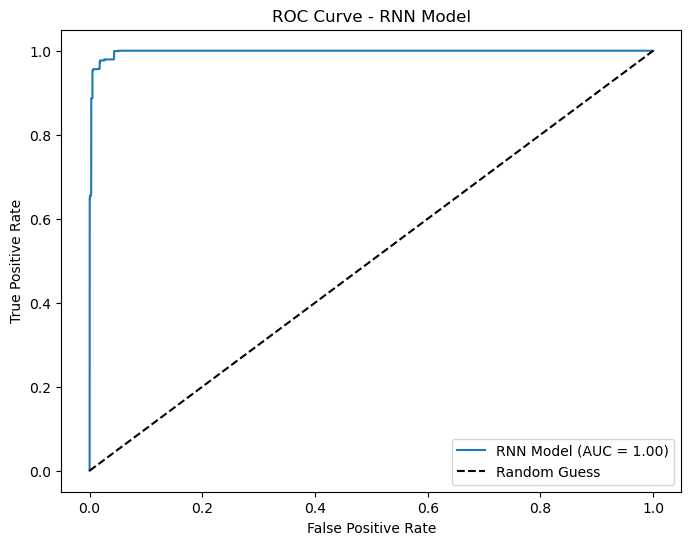

In [60]:
from sklearn.metrics import roc_curve, auc

# Obtaining predicted probabilities for the binary classification task (civilian_output)
y_pred_proba = model.predict([x_categorical_test, x_numerical_test])[1]

# Calculating FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_numerical_test, y_pred_proba)

# Calculating AUC score
auc_score = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RNN Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - RNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');


### Saving the Model

In [61]:
model.save("Ukrain_and_Russia_victims_and_subevent_predictor.h5")

## Prediction Function

In [62]:
def predictor (category_arr, numeric_arr):

    x_cat_features = ['disorder_type', 'event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2',
                      'country', 'admin1', 'admin2', 'admin3', 'location']
    x_num_val = np.array(list(numeric_arr.values()), dtype=np.float32)
    x_cat_val = []

    # Encode the values from category_arr to labels
    for i, (feature, val) in enumerate(zip(x_cat_features, category_arr)):
        encoded_val = label_encoders[feature].transform([val])[0]
        x_cat_val.append(encoded_val)

    x_cat_val = np.array(x_cat_val, dtype=np.int32)
    x_cat_val = np.reshape(x_cat_val, (1, -1))
    x_num_val = np.reshape(x_num_val, (1, -1))
    
    # Predict the values using the model
    batch_size = 32
    predictions = model.predict([x_cat_val, x_num_val], batch_size=batch_size)
    sub_event_type = np.argmax(predictions[0], axis=1)
    civilian_targeting = np.argmax(predictions[1], axis=1)

    # Convert the results to string
    sub_event_type = label_encoders['sub_event_type'].inverse_transform(sub_event_type)
   
    if civilian_targeting == 0:
        civilian_targeting_resp = 'No'
    else:
        civilian_targeting_resp = 'Yes'

    return sub_event_type[0], civilian_targeting_resp
